In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
data_path = '../../data/'

In [3]:
tti = pd.read_csv(data_path + 'train_TTI.csv')
tti['time'] = pd.to_datetime(tti['time'])
tti.head()

,id_road,TTI,speed,time
0,276183,1.03472,69.6197,2019-01-01 00:00:00
1,276183,1.03506,69.6275,2019-01-01 00:10:00
2,276183,1.04166,69.1003,2019-01-01 00:20:00
3,276183,1.02642,70.1266,2019-01-01 00:30:00
4,276183,1.01442,70.9565,2019-01-01 00:40:00


In [16]:
test_tti = pd.read_csv(data_path + 'toPredict_train_TTI.csv')
test_tti['time'] = pd.to_datetime(test_tti['time'])
test_tti.tail()

,id_road,TTI,speed,time
6043,276738,1.47263,27.9016,2020-01-01 20:10:00
6044,276738,1.47895,27.7825,2020-01-01 20:20:00
6045,276738,1.37184,29.9517,2020-01-01 20:30:00
6046,276738,1.41281,29.0830,2020-01-01 20:40:00
6047,276738,1.57808,26.0371,2020-01-01 20:50:00


In [17]:
test_timeline = pd.DataFrame({'time': pd.date_range('20191221 07:30:00', '20200101 21:30:00', freq='10min')})

In [30]:
test_tti_complete = test_tti.groupby('id_road').apply(lambda x: pd.merge(x, test_timeline, how='outer'))
test_tti_complete.drop('id_road', inplace=True, axis=1)
test_tti_complete.reset_index('id_road', inplace=True)
test_tti_complete.sort_values(['id_road', 'time'], inplace=True)
test_tti_complete.reset_index(inplace=True, drop=True)
test_tti_complete.head()

,id_road,TTI,speed,time
0,275911,1.05410,65.9403,2019-12-21 07:30:00
1,275911,1.06187,65.4578,2019-12-21 07:40:00
2,275911,1.04992,66.2031,2019-12-21 07:50:00
3,275911,1.04714,66.3787,2019-12-21 08:00:00
4,275911,1.08100,64.2997,2019-12-21 08:10:00


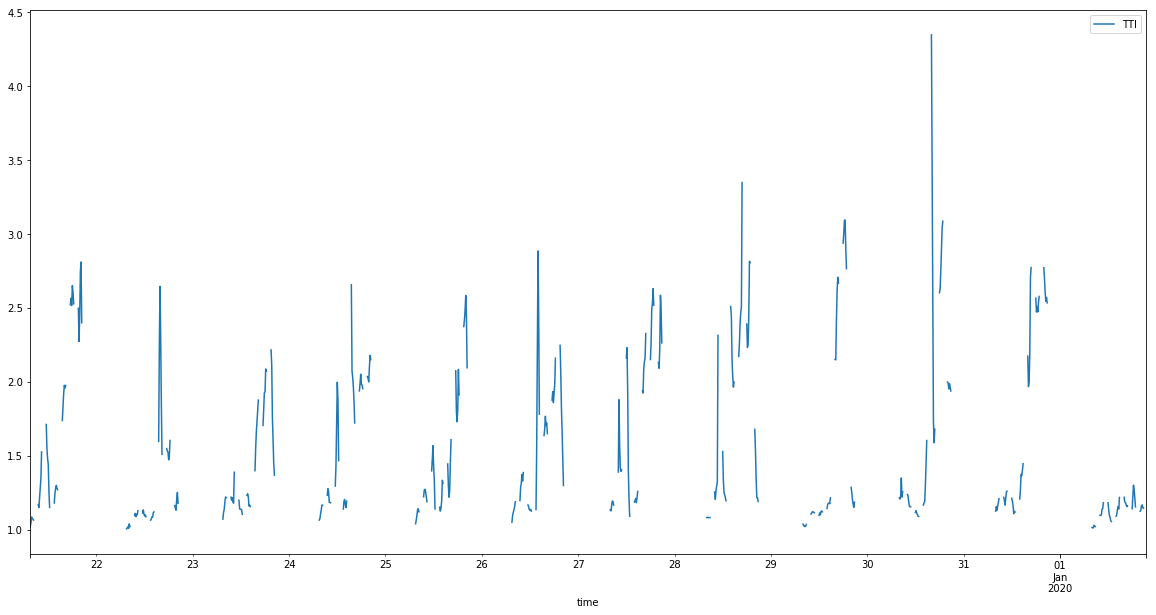

In [31]:
test_tti_complete[test_tti_complete['id_road']==276183].plot(x='time', y=['TTI'], figsize=(20, 10))

In [53]:
pred_tti = pd.read_csv(data_path + 'toPredict_noLabel.csv')
pred_tti['time'] = pd.to_datetime(pred_tti['time'])
pred_tti['year'] = pred_tti['time'].dt.year
pred_tti['month'] = pred_tti['time'].dt.month
pred_tti['day'] = pred_tti['time'].dt.day
pred_tti['hour'] = pred_tti['time'].dt.hour
pred_tti['minute'] = pred_tti['time'].dt.minute
pred_tti.head()

,id_sample,id_road,time,year,month,day,hour,minute
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40


In [40]:
tti['year'] = tti['time'].dt.year
tti['month'] = tti['time'].dt.month
tti['day'] = tti['time'].dt.day
tti['hour'] = tti['time'].dt.hour
tti['minute'] = tti['time'].dt.minute
tti.head()

,id_road,TTI,speed,time,year,month,day,hour,minute
0,276183,1.03472,69.6197,2019-01-01 00:00:00,2019,1,1,0,0
1,276183,1.03506,69.6275,2019-01-01 00:10:00,2019,1,1,0,10
2,276183,1.04166,69.1003,2019-01-01 00:20:00,2019,1,1,0,20
3,276183,1.02642,70.1266,2019-01-01 00:30:00,2019,1,1,0,30
4,276183,1.01442,70.9565,2019-01-01 00:40:00,2019,1,1,0,40


In [50]:
tti_copy = tti.copy()
tti_copy.drop(['speed', 'time'], axis=1, inplace=True)

In [51]:
tti_copy['day'] += 7

In [52]:
tti_copy = tti_copy[(tti_copy['month']==12)&(tti_copy['day']>=22)]
tti_copy.head()

,id_road,TTI,year,month,day,hour,minute
23739,276183,1.07643,2019,12,22,0,0
23740,276183,1.07165,2019,12,22,0,10
23741,276183,1.06181,2019,12,22,0,20
23742,276183,1.04844,2019,12,22,0,30
23743,276183,1.04762,2019,12,22,0,40


## 22号到28号

In [59]:
pred_tti_result = pd.merge(pred_tti, tti_copy, on=['id_road', 'year', 'month', 'day', 'hour', 'minute'], how='left')
pred_tti_result[pred_tti_result['id_road']==276183].head()

,id_sample,id_road,time,year,month,day,hour,minute,TTI
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,NaN
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,NaN
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,NaN
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,NaN
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,NaN


## 21号

In [62]:
true_tti_21 = tti[(tti['year']==2019)&(tti['month']==12)&(tti['day']==21)].copy()
true_tti_21.drop(['time', 'speed'], inplace=True, axis=1)
true_tti_21.head()

,id_road,TTI,year,month,day,hour,minute
24603,276183,1.11521,2019,12,21,0,0
24604,276183,1.11497,2019,12,21,0,10
24605,276183,1.08324,2019,12,21,0,20
24606,276183,1.08833,2019,12,21,0,30
24607,276183,1.08778,2019,12,21,0,40


In [63]:
pred_tti_result = pd.merge(pred_tti_result, true_tti_21, on=['id_road', 'year', 'month', 'day', 'hour', 'minute'], how='left')
pred_tti_result[pred_tti_result['id_road']==276183].head()

,id_sample,id_road,time,year,month,day,hour,minute,TTI_x,TTI_y
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,NaN,1.07890
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,NaN,1.05762
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,NaN,1.07482
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,NaN,1.72275
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,NaN,1.82338


## 29 30 31号

In [66]:
true_tti_15_17 = tti[(tti['year']==2019)&(tti['month']==12)&(tti['day'].isin([15, 16, 17]))].copy()
true_tti_15_17.drop(['time', 'speed'], inplace=True, axis=1)
true_tti_15_17['day']+=14
true_tti_15_17.tail()

,id_road,TTI,year,month,day,hour,minute
295635,276738,1.36848,2019,12,31,23,10
295636,276738,1.26464,2019,12,31,23,20
295637,276738,1.25062,2019,12,31,23,30
295638,276738,1.32827,2019,12,31,23,40
295639,276738,1.24253,2019,12,31,23,50


In [67]:
pred_tti_result = pd.merge(pred_tti_result, true_tti_15_17, on=['id_road', 'year', 'month', 'day', 'hour', 'minute'], how='left')
pred_tti_result[pred_tti_result['id_road']==276183].head()

,id_sample,id_road,time,year,month,day,hour,minute,TTI_x,TTI_y,TTI
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,NaN,1.07890,NaN
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,NaN,1.05762,NaN
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,NaN,1.07482,NaN
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,NaN,1.72275,NaN
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,NaN,1.82338,NaN


## 1号

In [69]:
true_tti_1 = tti[(tti['year']==2019)&(tti['month']==1)&(tti['day']==1)].copy()
true_tti_1.drop(['time', 'speed'], inplace=True, axis=1)
true_tti_1['year'] = 2020
true_tti_1.head()

,id_road,TTI,year,month,day,hour,minute
0,276183,1.03472,2020,1,1,0,0
1,276183,1.03506,2020,1,1,0,10
2,276183,1.04166,2020,1,1,0,20
3,276183,1.02642,2020,1,1,0,30
4,276183,1.01442,2020,1,1,0,40


In [70]:
pred_tti_result = pd.merge(pred_tti_result, true_tti_1, on=['id_road', 'year', 'month', 'day', 'hour', 'minute'], how='left')
pred_tti_result[pred_tti_result['id_road']==276183].head()

,id_sample,id_road,time,year,month,day,hour,minute,TTI_x,TTI_y,TTI_x,TTI_y
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,NaN,1.07890,NaN,NaN
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,NaN,1.05762,NaN,NaN
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,NaN,1.07482,NaN,NaN
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,NaN,1.72275,NaN,NaN
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,NaN,1.82338,NaN,NaN


## Final

In [74]:
pred_tti_result.columns

Index(['id_sample', 'id_road', 'time', 'year', 'month', 'day', 'hour',
       'minute', 'TTI_x', 'TTI_y', 'TTI_x', 'TTI_y'],
      dtype='object')

In [76]:
pred_tti_result.fillna(1, inplace=True)
pred_tti_result['TTI'] = pred_tti_result.iloc[:, -4]*pred_tti_result.iloc[:, -3]*pred_tti_result.iloc[:, -2]*pred_tti_result.iloc[:, -1]
pred_tti_result

,id_sample,id_road,time,year,month,day,hour,minute,TTI_x,TTI_y,TTI_x,TTI_y,TTI
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,1.00000,1.07890,1.00000,1.000000,1.078900
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,1.00000,1.05762,1.00000,1.000000,1.057620
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,1.00000,1.07482,1.00000,1.000000,1.074820
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,1.00000,1.72275,1.00000,1.000000,1.722750
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,1.00000,1.82338,1.00000,1.000000,1.823380
5,5,276183,2019-12-21 10:50:00,2019,12,21,10,50,1.00000,1.97630,1.00000,1.000000,1.976300
6,6,276183,2019-12-21 12:30:00,2019,12,21,12,30,1.00000,1.11895,1.00000,1.000000,1.118950
7,7,276183,2019-12-21 12:40:00,2019,12,21,12,40,1.00000,1.16228,1.00000,1.000000,1.162280
8,8,276183,2019-12-21 12:50:00,2019,12,21,12,50,1.00000,1.15440,1.00000,1.000000,1.154400
9,9,276183,2019-12-21 14:30:00,2019,12,21,14,30,1.00000,1.25660,1.00000,1.000000,1.256600


In [77]:
submit_example = pd.read_csv(data_path+'submit_example.csv')
submit_example.head()

,id_sample,TTI
0,0,0.142857
1,1,0.142857
2,2,0.142857
3,3,0.142857
4,4,0.142857


In [78]:
pred_tti_result[['id_sample', 'TTI']].to_csv('../result/method1_cai.csv', index=False)